In [1]:
%matplotlib ipympl
from onix.helpers import present_float
import numpy as np
import matplotlib.pyplot as plt


In [2]:
raw_data = np.load("raw_data.npz")
start_times = raw_data["start_times"]
end_times = raw_data["end_times"]
Zs = raw_data["Zs"]
W_Ts = raw_data["W_Ts"]

center_times = (start_times + end_times) / 2
center_time_offset = center_times[0]
center_time_offsetted = center_times - center_time_offset
center_time_offsetted_h = center_time_offsetted / 3600
cycle_times = end_times - start_times
num_of_cycles = len(start_times)
total_duration = end_times[-1] - start_times[0]
delta_W_Ts = W_Ts - np.average(W_Ts)

cycle_time_avg = np.average(cycle_times)
cycle_frequency_avg = 1 / cycle_time_avg
W_T_unc = np.std(W_Ts) / np.sqrt(num_of_cycles)

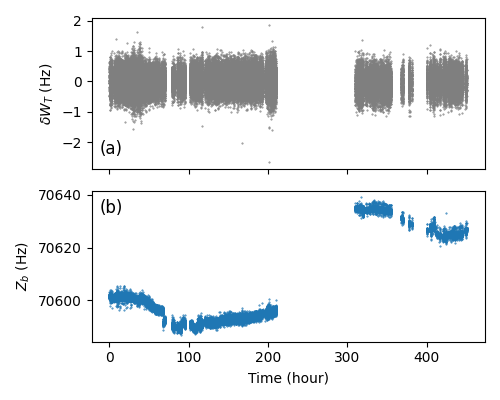

In [3]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(5, 4))
axs[1].set_ylabel("$Z_b$ (Hz)")
axs[0].set_ylabel("$\\delta W_T$ (Hz)")
axs[1].set_xlabel("Time (hour)")

axs[1].scatter(
    center_time_offsetted_h,
    Zs,
    color="C0",
    s=0.2,
    marker="o",
)
axs[0].text(0.02, 0.1, "(a)", transform=axs[0].transAxes, fontsize=12)
axs[0].scatter(
    center_time_offsetted_h,
    delta_W_Ts,
    color="C7",
    s=0.2,
    marker="o",
)
axs[1].text(0.02, 0.85, "(b)", transform=axs[1].transAxes, fontsize=12)
#axs[0].set_xlim(np.min(center_time_offsetted_h), np.max(center_time_offsetted_h))
plt.tight_layout()
plt.savefig("time-series.png", dpi=300)
plt.show()

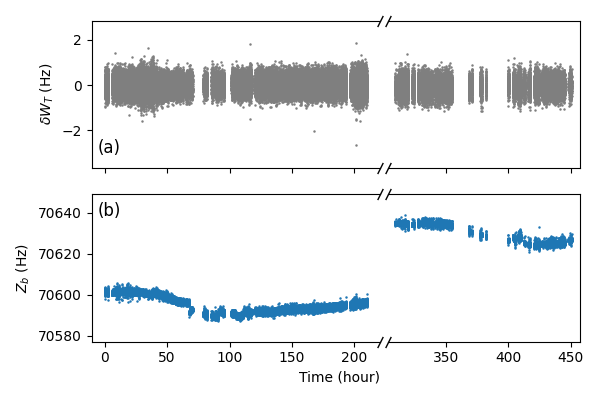

In [5]:
x_ratio = 1.5
fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(6, 4), width_ratios=(x_ratio, 1))
y_limits_Z_b = (np.min(Zs) - 10, np.max(Zs) + 10)
y_limits_W_T = (np.min(delta_W_Ts) - 1, np.max(delta_W_Ts) + 1)
break_center_time = 300
left_mask = center_time_offsetted_h < break_center_time
right_mask = center_time_offsetted_h > break_center_time
axs[1][0].set_ylabel("$Z_b$ (Hz)")
axs[0][0].set_ylabel("$\\delta W_T$ (Hz)")
axs[1][0].set_xlabel("Time (hour)", loc="right")
axs[1][0].scatter(
    center_time_offsetted_h[left_mask],
    Zs[left_mask],
    color="C0",
    s=0.6,
    marker="o",
)
axs[0][0].text(0.02, 0.1, "(a)", transform=axs[0][0].transAxes, fontsize=12)
axs[0][0].scatter(
    center_time_offsetted_h[left_mask],
    delta_W_Ts[left_mask],
    color="C7",
    s=0.6,
    marker="o",
)
axs[1][0].text(0.02, 0.85, "(b)", transform=axs[1][0].transAxes, fontsize=12)
axs[1][1].scatter(
    center_time_offsetted_h[right_mask],
    Zs[right_mask],
    color="C0",
    s=0.6,
    marker="o",
)
axs[0][1].scatter(
    center_time_offsetted_h[right_mask],
    delta_W_Ts[right_mask],
    color="C7",
    s=0.6,
    marker="o",
)
axs[0][0].set_xticklabels([])
axs[0][1].set_xticklabels([])
axs[0][0].set_ylim(*y_limits_W_T)
axs[0][1].set_ylim(*y_limits_W_T)
axs[1][0].set_ylim(*y_limits_Z_b)
axs[1][1].set_ylim(*y_limits_Z_b)
axs[0][1].set_yticklabels([])
axs[1][1].set_yticklabels([])
axs[0][0].spines["right"].set_visible(False)
axs[1][0].spines["right"].set_visible(False)
axs[0][1].set_yticks([])
axs[0][1].spines["left"].set_visible(False)
axs[1][1].set_yticks([])
axs[1][1].spines["left"].set_visible(False)
previous_xlim = axs[1][1].get_xlim()
left_xlim = axs[1][0].get_xlim()
left_xlim_range = left_xlim[1] - left_xlim[0]
xlim_center = (previous_xlim[0] + previous_xlim[1]) / 2
new_xlim_left = (-left_xlim_range / 2 / x_ratio + xlim_center, left_xlim_range / 2 / x_ratio + xlim_center)
axs[0][1].set_xlim(*new_xlim_left)
axs[1][1].set_xlim(*new_xlim_left)

d = 2  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
axs[0][0].plot([1, 1], [0, 1], transform=axs[0][0].transAxes, **kwargs)
axs[1][0].plot([1, 1], [0, 1], transform=axs[1][0].transAxes, **kwargs)
axs[0][1].plot([0, 0], [1, 0], transform=axs[0][1].transAxes, **kwargs)
axs[1][1].plot([0, 0], [1, 0], transform=axs[1][1].transAxes, **kwargs)

# TODO: tick on the right plots.

plt.tight_layout()
fig.subplots_adjust(wspace=0.03, )
plt.savefig("time-series.png", dpi=300)
plt.show()

In [6]:
print(f"Time: {total_duration:.1f} s, N_cycle = {num_of_cycles}")
print(f"Cycle time (laser unlock time not included): {np.average(cycle_times):.2f} s, cycle frequency {cycle_frequency_avg:.2f} Hz")
print("W_T =", present_float(np.average(W_Ts * 1e3), W_T_unc * 1e3, 2), "mHz")
print(f"W_T_unc sensitivity = {W_T_unc * 1e3 / np.sqrt(3600 / total_duration):.1f} mHz sqrt(hr)")
print(f"W_T_unc per cycle = {W_T_unc * np.sqrt(num_of_cycles):.2f} Hz")

Time: 1624171.2 s, N_cycle = 104245
Cycle time (laser unlock time not included): 6.73 s, cycle frequency 0.15 Hz
W_T = -524.75(92) mHz
W_T_unc sensitivity = 19.6 mHz sqrt(hr)
W_T_unc per cycle = 0.30 Hz


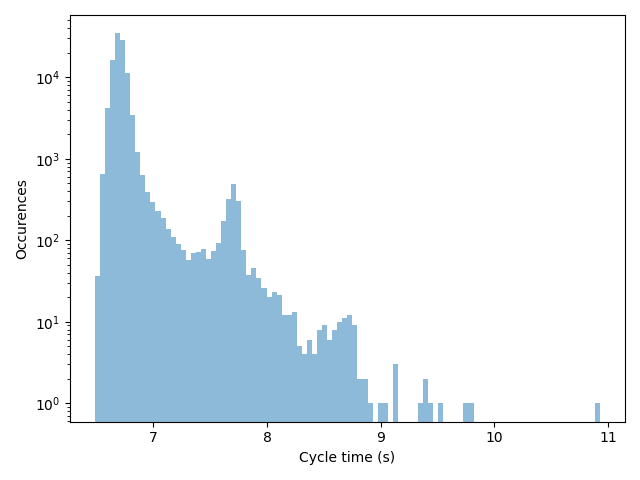

In [7]:
fig, ax = plt.subplots()
ax.hist(cycle_times, bins=100, alpha=0.5)
ax.set_xlabel("Cycle time (s)")
ax.set_ylabel("Occurences")
ax.set_yscale("log")
plt.tight_layout()
plt.show()

In [8]:
print(num_of_cycles)
print(cycle_time_avg, cycle_frequency_avg)
print(total_duration, 1/total_duration)

104245
6.730140458972021 0.14858530904312547
1624171.1756379604 6.156986498711927e-07
